1000it [08:23,  1.98it/s]


[18:48:22] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 31
[18:48:22] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[18:48:22] Explicit valence for atom # 6 N, 4, is greater than permitted
[18:48:22] Initializing MetalDisconnector
[18:48:22] Running MetalDisconnector
[18:48:22] Initializing Normalizer
[18:48:22] Running Normalizer
[18:48:22] Running LargestFragmentChooser
[18:48:22] Running Normalizer
[18:48:22] Running Uncharger


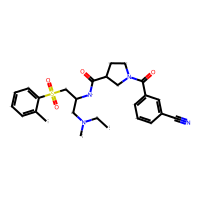

[18:48:23] WARNING: Accepted unusual valence(s): C(1); C(2); C(3); N(2)



FileNotFoundError: [Errno 2] No such file or directory: './full_15_39_atoms_conf_chembl.inchi'

In [2]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw

def exact_match(mol, source):
    sample_inchi = Chem.MolToInchi(mol)

    with open(source, "r") as f:
        lines = f.readlines()
        for line in lines:
            cid, inchi = line.replace("\n", "").split('\t')
            if sample_inchi == inchi:
                return True

    return False
    
device = "cpu"
generator = MLConformerGenerator(device=device)
source_path = "./full_15_39_atoms_conf_chembl.inchi"

ref_mol = Chem.MolFromMolFile("test_1.mol")
# rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=4)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    print(f"Found in training Dataset - { not exact_match(Chem.MolFromMolBlock(sample['mol_block']), source_path)}")
    view = py3Dmol.view(width=400, height=300)
    view.addModel(sample['mol_block'], 'mol')
    view.addModel(Chem.MolToMolBlock(ref_mol), 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()
    view.show()
    print(f"Shape Tanimoto - {sample['shape_tanimoto']}")